VARIABLES DE MI DATAFRAME: 

name: El nombre o título de la película.

rating: La clasificación de la película, como R, PG-13, etc.

genre: El género principal de la película, por ejemplo, acción, drama, comedia, etc.

year: El año de estreno de la película.

released: La fecha de lanzamiento de la película.

score: La puntuación o calificación de IMDb de la película.

votes: El número de votos de usuarios de IMDb para la película.

director: El director de la película.

writer: El guionista o autor del guión de la película.

star: El actor o actriz principal de la película.

Fuente:  https://www.kaggle.com/code/ericyooon/the-movie-dataset/input


LIBRERIAS 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

CARGO LOS DATA SETS 

In [2]:
df= pd.read_csv(r"C:\Users\keyke\Documents\botcam\Proyecto\scr\Data\raw\movies.csv")
df2= pd.read_csv(r"C:\Users\keyke\Documents\botcam\Proyecto\scr\Data\raw\tmdb_5000_movies.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [5]:
#Renombro las columnas en para que tengan un nombre  en comun con el primer data
df2.rename(columns={'title': 'name','revenue ': 'gross'}, inplace=True)

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [7]:
#Itero para que me rellene los fillna con los datos del otro data set
columnas_en_comun = list(set(df.columns) & set(df2.columns))
for columna in columnas_en_comun:
    df[columna].fillna(df2[columna], inplace=True)

In [8]:
#he mejorado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    7029 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [9]:
#Miro los nulos 
df.isnull().sum()

name          0
rating       77
genre         0
year          0
released      2
score         3
votes         3
director      0
writer        3
star          1
country       3
budget      639
gross       189
company      17
runtime       4
dtype: int64

In [10]:
#Cargo otro data Set para ver si consigo rellenar mas datos
df3= pd.read_csv(r"C:\Users\keyke\Documents\botcam\Proyecto\scr\Data\raw\movies_metadata.csv")

C:\Users\keyke\AppData\Local\Temp\ipykernel_816\3466767626.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df3= pd.read_csv(r"C:\Users\keyke\Documents\botcam\Proyecto\scr\Data\raw\movies_metadata.csv")


In [11]:
df3.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [12]:
#Renombro para tener columnas en comun 
df3.rename(columns={'original_title': 'name','production_companies': 'company  '}, inplace=True)

In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   name                   45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  company                45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [14]:
#Itero para rellenar los datos faltantes con el nuevo data set
columnas_en_comun = list(set(df.columns) & set(df3.columns))
for columna in columnas_en_comun:
    df[columna].fillna(df3[columna], inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    7668 non-null   object 
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7668 non-null   float64
dtypes: float64(4), int64(1), object(10)
memory usage: 898.7+ KB


In [16]:
#mejoro algo
df.isnull().sum()

name          0
rating       77
genre         0
year          0
released      2
score         3
votes         3
director      0
writer        3
star          1
country       3
budget        0
gross       189
company      17
runtime       0
dtype: int64

In [17]:
df=df.dropna()

In [18]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [19]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000.0,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,36000000,3661.0,Prowess Pictures,98.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,0,413378.0,Pryor Entertainment,120.0


In [20]:
#Miro si hay duplicados
dupli= df.duplicated().sum()
print(dupli)

0


In [21]:
#Guardo mi data frame
df.to_csv(r'C:\Users\keyke\Documents\botcam\Proyecto\scr\Data\raw\pelis.csv', index=False)


*ANALISIS DE CADA COLUMNA CON EL FIN DE CONVERTIR TODO A NUMERICO

In [22]:
df["rating"].unique()

array(['R', 'PG', 'G', 'Not Rated', 'NC-17', 'Approved', 'PG-13',
       'Unrated', 'X', 'TV-PG', 'TV-MA', 'TV-14'], dtype=object)

In [23]:
def map_column_values(df, column):
    valores_unicos = df[column].unique()  # Obtener los valores únicos de la columna
    mapeo = {valor: i+1 for i, valor in enumerate(valores_unicos)}  # Crear el diccionario de mapeo
    df[column] = df[column].map(mapeo)  # Aplicar el mapeo a la columna
    return df
df = map_column_values(df, 'rating')

In [24]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,1,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,1,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,2,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,2,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,1,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [25]:
df["genre"].unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Animation', 'Romance', 'Music',
       'Western', 'Thriller', 'Sci-Fi', 'Mystery', 'Sport', 'Musical'],
      dtype=object)

In [26]:
mapeo2 = {'Drama': 1, 'Adventure': 2, 'Action': 3, 'Comedy': 4, 'Horror': 5, 'Biography': 6, 'Crime': 7, 'Fantasy': 8, 'Family': 9, 'Animation': 10, 'Romance': 11, 'Music': 12, 'Western': 13, 'Thriller': 14, 'Sci-Fi': 15, 'Mystery': 16, 'Sport': 17, 'Musical': 18}

# Crear una nueva columna 'genre_n' y asignar los números de mapeo
df['genre_n'] = df['genre'].map(mapeo2)

In [27]:
def map_column_values(df, column):
    valores_unicos = df[column].unique()  # Obtener los valores únicos de la columna
    mapeo = {valor: i+1 for i, valor in enumerate(valores_unicos)}  # Crear el diccionario de mapeo
    df[column] = df[column].map(mapeo)  # Aplicar el mapeo a la columna
    return df
df = map_column_values(df, 'genre')

In [28]:
def map_column_values(df, column):
    valores_unicos = df[column].unique()  # Obtener los valores únicos de la columna
    mapeo = {valor: i+1 for i, valor in enumerate(valores_unicos)}  # Crear el diccionario de mapeo
    df[column] = df[column].map(mapeo)  # Aplicar el mapeo a la columna
    return df
df = map_column_values(df, 'director')

In [29]:
def map_column_values(df, column):
    valores_unicos = df[column].unique()  # Obtener los valores únicos de la columna
    mapeo = {valor: i+1 for i, valor in enumerate(valores_unicos)}  # Crear el diccionario de mapeo
    df[column] = df[column].map(mapeo)  # Aplicar el mapeo a la columna
    return df
df = map_column_values(df, 'writer')

In [30]:
def map_column_values(df, column):
    valores_unicos = df[column].unique()  # Obtener los valores únicos de la columna
    mapeo = {valor: i+1 for i, valor in enumerate(valores_unicos)}  # Crear el diccionario de mapeo
    df[column] = df[column].map(mapeo)  # Aplicar el mapeo a la columna
    return df
df = map_column_values(df, 'star')

In [31]:
def map_column_values(df, column):
    valores_unicos = df[column].unique()  # Obtener los valores únicos de la columna
    mapeo = {valor: i+1 for i, valor in enumerate(valores_unicos)}  # Crear el diccionario de mapeo
    df[column] = df[column].map(mapeo)  # Aplicar el mapeo a la columna
    return df
df = map_column_values(df, 'country')

In [32]:
def map_column_values(df, column):
    valores_unicos = df[column].unique()  # Obtener los valores únicos de la columna
    mapeo = {valor: i+1 for i, valor in enumerate(valores_unicos)}  # Crear el diccionario de mapeo
    df[column] = df[column].map(mapeo)  # Aplicar el mapeo a la columna
    return df
df = map_column_values(df, 'company')

In [33]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,genre_n
0,The Shining,1,1,1980,"June 13, 1980 (United States)",8.4,927000.0,1,1,1,1,19000000.0,46998772.0,1,146.0,1
1,The Blue Lagoon,1,2,1980,"July 2, 1980 (United States)",5.8,65000.0,2,2,2,2,4500000.0,58853106.0,2,104.0,2
2,Star Wars: Episode V - The Empire Strikes Back,2,3,1980,"June 20, 1980 (United States)",8.7,1200000.0,3,3,3,2,18000000.0,538375067.0,3,124.0,3
3,Airplane!,2,4,1980,"July 2, 1980 (United States)",7.7,221000.0,4,4,4,2,3500000.0,83453539.0,4,88.0,4
4,Caddyshack,1,4,1980,"July 25, 1980 (United States)",7.3,108000.0,5,5,5,2,6000000.0,39846344.0,5,98.0,4


In [34]:
#Cambiamos la columna budget a numerica
df['budget'] = df['budget'].astype("int64")

In [35]:
#Voy a tratar la Columan de release. Para ello voy a separ el dia, el mes, y pais de estreno y luego hacerlo todo numerico
df['released_day'] = df['released'].str.extract('(\d+),')

df['released_country'] = df['released'].str.extract('\((.*?)\)')
valores_unicos5 = df['released_country'].unique()
mapeo7 = {valor: i+1 for i, valor in enumerate(valores_unicos5)}
df['released_country'] = df['released_country'].map(mapeo7)
df['released_month'] = df['released'].str.extract('([A-Za-z]+)')
#valores_unicos6 = df['released_month'].unique()   
meses={'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
         'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}                                   
mapeo8 = {valor: i+1 for i, valor in enumerate(meses)}
df['released_month_n'] = df['released_month'].map(mapeo8)




In [36]:
df['votes'] = df['votes'].astype("int64")

In [37]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,genre_n,released_day,released_country,released_month,released_month_n
0,The Shining,1,1,1980,"June 13, 1980 (United States)",8.4,927000,1,1,1,1,19000000,46998772.0,1,146.0,1,13,1,June,6.0
1,The Blue Lagoon,1,2,1980,"July 2, 1980 (United States)",5.8,65000,2,2,2,2,4500000,58853106.0,2,104.0,2,2,1,July,7.0
2,Star Wars: Episode V - The Empire Strikes Back,2,3,1980,"June 20, 1980 (United States)",8.7,1200000,3,3,3,2,18000000,538375067.0,3,124.0,3,20,1,June,6.0
3,Airplane!,2,4,1980,"July 2, 1980 (United States)",7.7,221000,4,4,4,2,3500000,83453539.0,4,88.0,4,2,1,July,7.0
4,Caddyshack,1,4,1980,"July 25, 1980 (United States)",7.3,108000,5,5,5,2,6000000,39846344.0,5,98.0,4,25,1,July,7.0


PROBLEMAS EN LA COLUMNA DE LOS DATOS RELEASED MONTH, FALTAN DATOS. LOS BUSCO Y CONVIERTO TODO A INT

In [38]:
df['released_month'].unique()

array(['June', 'July', 'May', 'December', 'October', 'September',
       'February', 'April', 'August', 'March', 'January', 'November',
       'Japan', 'Taiwan', 'United', 'Iran'], dtype=object)

In [39]:
search_values = ['Taiwan', 'United', 'Iran',"Japan"]
mask = df['released_month'].str.contains('|'.join(search_values), case=False)
filtered_df = df[mask]
filtered_df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,genre_n,released_day,released_country,released_month,released_month_n
312,Five Days One Summer,2,1,1982,1982 (Japan),6.1,1000,241,263,87,2,15000000,199078.0,136,108.0,1,NaN,8,Japan,NaN
786,Taipei Story,4,1,1985,1985 (Taiwan),7.7,2500,449,586,431,22,68490000,35336.0,298,119.0,1,NaN,16,Taiwan,NaN
800,O.C. and Stiggs,1,4,1985,1985 (United States),5.4,1200,13,595,440,2,7000000,29815.0,14,109.0,4,NaN,1,United,NaN
1173,The House on Carroll Street,2,14,1987,1987 (United States),6.1,2300,119,825,594,2,14000000,459824.0,5,101.0,14,NaN,1,United,NaN
2816,The White Balloon,8,1,1995,1995 (Iran),7.7,6900,1148,1815,1131,35,150000,924940.0,865,85.0,1,NaN,26,Iran,NaN
4187,Dahmer,1,6,2002,2019 (United States),5.6,9700,1632,2642,1579,2,250000,144008.0,1240,101.0,6,NaN,1,United,NaN
6413,Romeo and Juliet,7,1,2013,2013 (United States),5.8,11000,1147,3775,2245,1,0,2966268.0,1819,118.0,1,NaN,1,United,NaN


In [40]:
df.loc[df.index == 312, 'released_day'] = 12
df.loc[df.index == 312, 'released_month'] = 'November'
df.loc[df.index == 312, 'released_month_n'] = 11


In [41]:
df.loc[df.index == 786, 'released_day'] = 22
df.loc[df.index == 786, 'released_month'] = 'April'
df.loc[df.index == 786, 'released_month_n'] = 4


In [42]:
df.loc[df.index == 800, 'released_day'] = 10
df.loc[df.index == 800, 'released_month'] = 'July'
df.loc[df.index == 800, 'released_month_n'] = 7

In [43]:
df.loc[df.index == 1173, 'released_day'] = 4
df.loc[df.index == 1173, 'released_month'] = 'March'
df.loc[df.index == 1173, 'released_month_n'] = 3

In [44]:
df.loc[df.index == 2816, 'released_day'] = 27
df.loc[df.index == 2816, 'released_month'] = 'November'
df.loc[df.index == 2816, 'released_month_n'] = 11

In [45]:
df.loc[df.index == 4187, 'released_day'] = 21
df.loc[df.index == 4187, 'released_month'] = 'June'
df.loc[df.index == 4187, 'released_month_n'] = 6

In [46]:
df.loc[df.index == 6413, 'released_day'] = 7
df.loc[df.index == 6413, 'released_month'] = 'March'
df.loc[df.index == 6413, 'released_month_n'] = 3

In [47]:
df['released_month'].unique()

array(['June', 'July', 'May', 'December', 'October', 'September',
       'February', 'April', 'August', 'March', 'January', 'November'],
      dtype=object)

In [48]:
df['released_month_n'] = df['released_month_n'].astype("int64")

In [49]:
df['released_day'].unique()

array(['13', '2', '20', '25', '9', '19', '16', '17', '26', '12', '3', '8',
       '15', '24', '1', '6', '21', '18', '10', '30', '7', '27', '31',
       '11', '28', '23', '22', '14', '5', '29', '4', 12, nan, 22, 10, 4,
       27, 21, 7], dtype=object)

In [50]:
mask2 = df['released_day'].isnull()
filtered_df2 = df[mask2]
filtered_df2


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,genre_n,released_day,released_country,released_month,released_month_n
376,Nostalghia,4,1,1983,March 1992 (United States),8.1,24000,268,302,243,6,90000000,55269.0,161,125.0,1,NaN,1,March,3
439,Heat and Dust,1,1,1983,January 1983 (United Kingdom),6.6,1600,144,353,271,1,80000000,1772889.0,91,130.0,1,NaN,11,January,1
449,Getting It on,1,4,1983,August 1983 (United States),3.7,208,311,360,278,2,220000,975414.0,194,96.0,4,NaN,1,August,8
463,Slayground,1,7,1983,February 1984 (United States),4.9,360,319,368,284,1,0,108128.0,200,89.0,7,NaN,1,February,2
467,My Brother's Wedding,4,1,1983,March 1985 (United States),7.2,826,321,369,285,2,50000,26177.0,201,115.0,1,NaN,1,March,3
719,Tampopo,4,4,1985,September 1987 (United States),8.0,17000,423,544,402,18,60000000,444213.0,272,114.0,4,NaN,1,September,9
731,Trouble in Mind,1,4,1985,March 1986 (United States),6.5,1800,65,460,22,2,60000000,19632.0,275,111.0,4,NaN,1,March,3
1035,Duet for One,1,1,1986,February 1987 (United States),6.8,840,412,748,110,2,47000000,8736.0,120,107.0,1,NaN,1,February,2
1212,Five Corners,1,7,1987,May 1988 (United Kingdom),6.2,3100,30,766,611,1,5500000,969205.0,387,90.0,7,NaN,11,May,5
1227,A Man in Love,1,1,1987,September 1987 (United States),5.9,541,612,859,284,7,30000000,949451.0,428,125.0,1,NaN,1,September,9


In [51]:
# Borro esta columna 
df = df.drop('released_day', axis=1)


In [52]:
#Convierto el resto a Int
df['gross'] = df['gross'].astype("int64")
df['runtime'] = df['runtime'].astype('Int64')

PROBLEMAS CON LA COLUMNA SCORE

In [53]:
df["score"].unique()

array([8.4, 5.8, 8.7, 7.7, 7.3, 6.4, 7.9, 8.2, 6.8, 7. , 6.1, 5.3, 7.1,
       7.2, 6.6, 6.9, 6.5, 6.7, 6.2, 5.4, 6.3, 6. , 5.9, 7.5, 4.8, 5.1,
       4.6, 5. , 4.7, 5.5, 5.2, 4. , 4.3, 7.4, 7.6, 4.9, 3.4, 7.8, 5.6,
       2.7, 8.1, 4.4, 8. , 5.7, 3.7, 3.9, 3.5, 8.3, 4.1, 3. , 3.8, 4.5,
       8.5, 4.2, 3.2, 2.6, 2.2, 3.6, 3.1, 8.6, 2.9, 8.9, 9.3, 8.8, 3.3,
       2.5, 2.3, 2.1, 1.9, 2.4, 2.8, 9. ])

In [54]:
df["score"] = df["score"].astype(str).str.replace(r'\.\s', '.0')





C:\Users\keyke\AppData\Local\Temp\ipykernel_816\2407926419.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["score"] = df["score"].astype(str).str.replace(r'\.\s', '.0')


In [55]:
df["score"].unique()

array(['8.4', '5.8', '8.7', '7.7', '7.3', '6.4', '7.9', '8.2', '6.8',
       '7.0', '6.1', '5.3', '7.1', '7.2', '6.6', '6.9', '6.5', '6.7',
       '6.2', '5.4', '6.3', '6.0', '5.9', '7.5', '4.8', '5.1', '4.6',
       '5.0', '4.7', '5.5', '5.2', '4.0', '4.3', '7.4', '7.6', '4.9',
       '3.4', '7.8', '5.6', '2.7', '8.1', '4.4', '8.0', '5.7', '3.7',
       '3.9', '3.5', '8.3', '4.1', '3.0', '3.8', '4.5', '8.5', '4.2',
       '3.2', '2.6', '2.2', '3.6', '3.1', '8.6', '2.9', '8.9', '9.3',
       '8.8', '3.3', '2.5', '2.3', '2.1', '1.9', '2.4', '2.8', '9.0'],
      dtype=object)

In [56]:
df["score"].astype(float)


0       8.4
1       5.8
2       8.7
3       7.7
4       7.3
       ... 
7651    6.8
7652    6.8
7653    5.4
7656    5.0
7659    3.4
Name: score, Length: 7413, dtype: float64

In [57]:
df["score"].unique()

array(['8.4', '5.8', '8.7', '7.7', '7.3', '6.4', '7.9', '8.2', '6.8',
       '7.0', '6.1', '5.3', '7.1', '7.2', '6.6', '6.9', '6.5', '6.7',
       '6.2', '5.4', '6.3', '6.0', '5.9', '7.5', '4.8', '5.1', '4.6',
       '5.0', '4.7', '5.5', '5.2', '4.0', '4.3', '7.4', '7.6', '4.9',
       '3.4', '7.8', '5.6', '2.7', '8.1', '4.4', '8.0', '5.7', '3.7',
       '3.9', '3.5', '8.3', '4.1', '3.0', '3.8', '4.5', '8.5', '4.2',
       '3.2', '2.6', '2.2', '3.6', '3.1', '8.6', '2.9', '8.9', '9.3',
       '8.8', '3.3', '2.5', '2.3', '2.1', '1.9', '2.4', '2.8', '9.0'],
      dtype=object)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7413 entries, 0 to 7659
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              7413 non-null   object
 1   rating            7413 non-null   int64 
 2   genre             7413 non-null   int64 
 3   year              7413 non-null   int64 
 4   released          7413 non-null   object
 5   score             7413 non-null   object
 6   votes             7413 non-null   int64 
 7   director          7413 non-null   int64 
 8   writer            7413 non-null   int64 
 9   star              7413 non-null   int64 
 10  country           7413 non-null   int64 
 11  budget            7413 non-null   int64 
 12  gross             7413 non-null   int64 
 13  company           7413 non-null   int64 
 14  runtime           7413 non-null   Int64 
 15  genre_n           7413 non-null   int64 
 16  released_country  7413 non-null   int64 
 17  released_month

In [59]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,genre_n,released_country,released_month,released_month_n
0,The Shining,1,1,1980,"June 13, 1980 (United States)",8.4,927000,1,1,1,1,19000000,46998772,1,146,1,1,June,6
1,The Blue Lagoon,1,2,1980,"July 2, 1980 (United States)",5.8,65000,2,2,2,2,4500000,58853106,2,104,2,1,July,7
2,Star Wars: Episode V - The Empire Strikes Back,2,3,1980,"June 20, 1980 (United States)",8.7,1200000,3,3,3,2,18000000,538375067,3,124,3,1,June,6
3,Airplane!,2,4,1980,"July 2, 1980 (United States)",7.7,221000,4,4,4,2,3500000,83453539,4,88,4,1,July,7
4,Caddyshack,1,4,1980,"July 25, 1980 (United States)",7.3,108000,5,5,5,2,6000000,39846344,5,98,4,1,July,7


In [60]:
df["star"].unique()

array([   1,    2,    3, ..., 2650, 2651, 2652], dtype=int64)

In [61]:
df["released_month"].unique()

array(['June', 'July', 'May', 'December', 'October', 'September',
       'February', 'April', 'August', 'March', 'January', 'November'],
      dtype=object)

In [62]:
def mes(df, column):
    meses = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7,
             'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
    mapeo = {valor: i+1 for i, valor in enumerate(meses)}
    df[column] = df[column].map(mapeo)
    df[column] = df[column].astype(int)
    return df
df = mes(df, 'released_month')




In [63]:
df = df.drop('released_month_n', axis=1)
df = df.drop('genre_n', axis=1)

In [64]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_country,released_month
0,The Shining,1,1,1980,"June 13, 1980 (United States)",8.4,927000,1,1,1,1,19000000,46998772,1,146,1,6
1,The Blue Lagoon,1,2,1980,"July 2, 1980 (United States)",5.8,65000,2,2,2,2,4500000,58853106,2,104,1,7
2,Star Wars: Episode V - The Empire Strikes Back,2,3,1980,"June 20, 1980 (United States)",8.7,1200000,3,3,3,2,18000000,538375067,3,124,1,6
3,Airplane!,2,4,1980,"July 2, 1980 (United States)",7.7,221000,4,4,4,2,3500000,83453539,4,88,1,7
4,Caddyshack,1,4,1980,"July 25, 1980 (United States)",7.3,108000,5,5,5,2,6000000,39846344,5,98,1,7


BORRO TODAS LAS COLUMNAS NO NUMERICAS. 

In [65]:
def eliminar_columnas_no_numericas(datos):
    columnas_numericas = datos.select_dtypes(include=['number']).columns
    datos_numericos = datos[columnas_numericas]
    return datos_numericos
df = eliminar_columnas_no_numericas(df)




In [66]:
#Guardo mi data frame numerico 
df.to_csv(r'C:\Users\keyke\Documents\botcam\Proyecto\scr\Data\Processed\datafims.csv', index=False)

In [67]:
df.head()

,rating,genre,year,votes,director,writer,star,country,budget,gross,company,runtime,released_country,released_month
0,1,1,1980,927000,1,1,1,1,19000000,46998772,1,146,1,6
1,1,2,1980,65000,2,2,2,2,4500000,58853106,2,104,1,7
2,2,3,1980,1200000,3,3,3,2,18000000,538375067,3,124,1,6
3,2,4,1980,221000,4,4,4,2,3500000,83453539,4,88,1,7
4,1,4,1980,108000,5,5,5,2,6000000,39846344,5,98,1,7


EMPIEZO EL ANALISIS DE LOS DATOS DE MI DATA 

In [68]:
df= pd.read_csv(r"C:\Users\keyke\Documents\botcam\Proyecto\scr\Data\Processed\datafims.csv")

<Axes: >

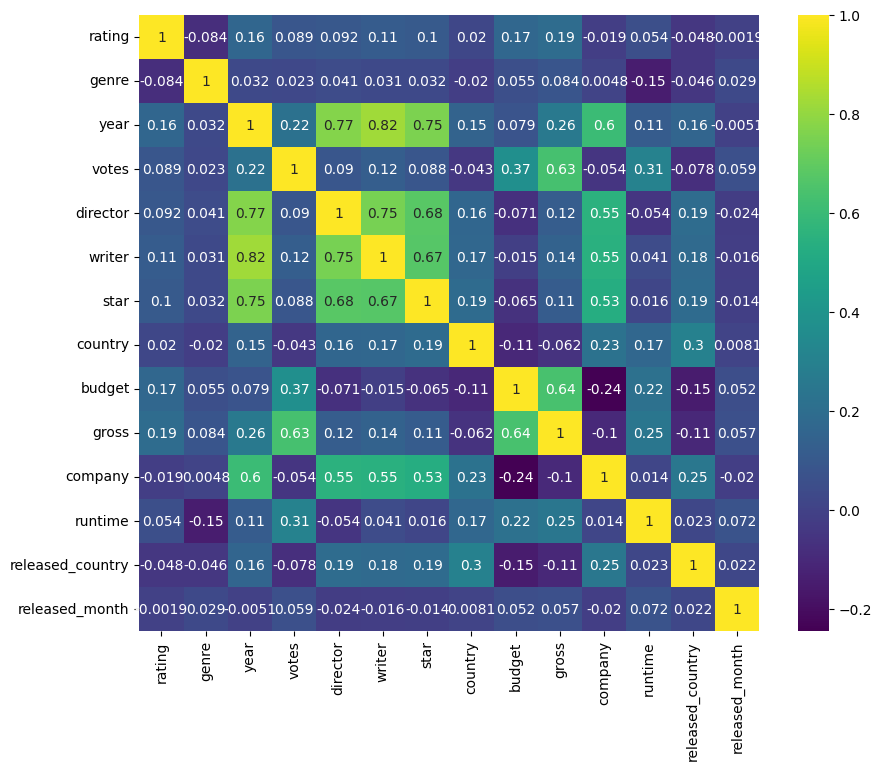

In [69]:

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),annot=True,cmap="viridis")

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7413 entries, 0 to 7412
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   rating            7413 non-null   int64
 1   genre             7413 non-null   int64
 2   year              7413 non-null   int64
 3   votes             7413 non-null   int64
 4   director          7413 non-null   int64
 5   writer            7413 non-null   int64
 6   star              7413 non-null   int64
 7   country           7413 non-null   int64
 8   budget            7413 non-null   int64
 9   gross             7413 non-null   int64
 10  company           7413 non-null   int64
 11  runtime           7413 non-null   int64
 12  released_country  7413 non-null   int64
 13  released_month    7413 non-null   int64
dtypes: int64(14)
memory usage: 810.9 KB


In [71]:
matriz_corr = df.corr()
print(matriz_corr) 

                    rating     genre      year     votes  director    writer  \
rating            1.000000 -0.083614  0.159851  0.088978  0.091625  0.110881   
genre            -0.083614  1.000000  0.032012  0.023498  0.041367  0.030849   
year              0.159851  0.032012  1.000000  0.218883  0.767350  0.822165   
votes             0.088978  0.023498  0.218883  1.000000  0.090320  0.122760   
director          0.091625  0.041367  0.767350  0.090320  1.000000  0.746925   
writer            0.110881  0.030849  0.822165  0.122760  0.746925  1.000000   
star              0.101369  0.032148  0.753371  0.087754  0.679032  0.672940   
country           0.019673 -0.019678  0.145892 -0.042996  0.163544  0.167157   
budget            0.168838  0.055034  0.078616  0.372843 -0.070563 -0.015240   
gross             0.192518  0.084036  0.258772  0.631114  0.118248  0.140883   
company          -0.019043  0.004783  0.601918 -0.054183  0.551649  0.546073   
runtime           0.054404 -0.145348  0.

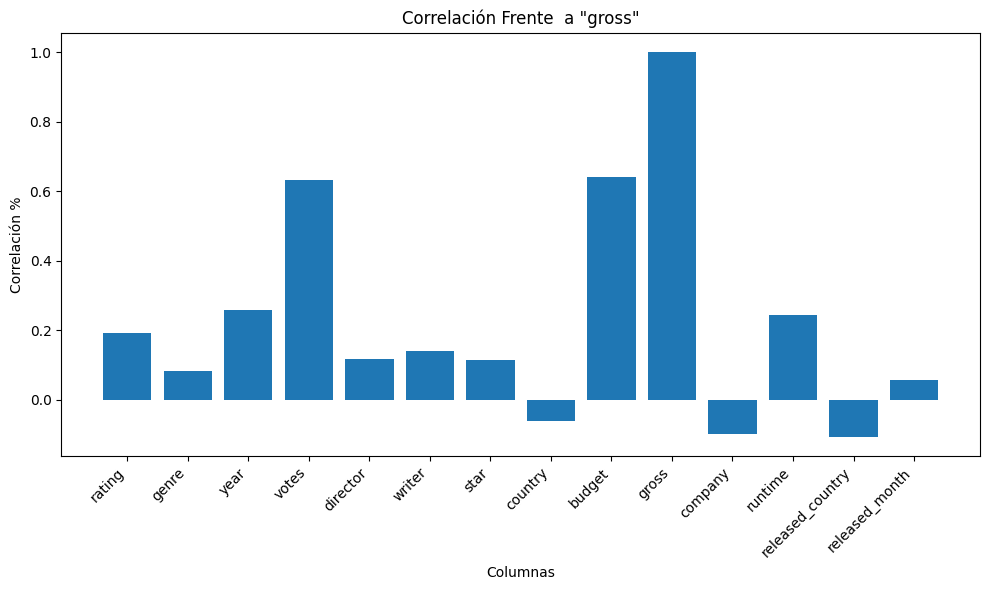

In [84]:

# Datos de correlación 
correlation_data = {
    'rating': [1.000000, -0.083614, 0.159851, 0.088978, 0.091625, 0.110881, 0.101369, 0.019673, 0.168838, 0.192518, -0.019043, 0.054404, -0.048375, -0.001853],
    'genre': [-0.083614, 1.000000, 0.032012, 0.023498, 0.041367, 0.030849, 0.032148, -0.019678, 0.055034, 0.084036, 0.004783, -0.145348, -0.045745, 0.028839],
    'year': [0.159851, 0.032012, 1.000000, 0.218883, 0.767350, 0.822165, 0.753371, 0.145892, 0.078616, 0.258772, 0.601918, 0.114406, 0.156172, -0.005142],
    'votes': [0.088978, 0.023498, 0.218883, 1.000000, 0.090320, 0.122760, 0.087754, -0.042996, 0.372843, 0.631114, -0.054183, 0.309847, -0.077787, 0.058917],
    'director': [0.091625, 0.041367, 0.767350, 0.090320, 1.000000, 0.746925, 0.679032, 0.163544, -0.070563, 0.118248, 0.551649, -0.054053, 0.188826, -0.023900],
    'writer': [0.110881, 0.030849, 0.822165, 0.122760, 0.746925, 1.000000, 0.672940, 0.167157, -0.015240, 0.140883, 0.546073, 0.040868, 0.181056, -0.016478],
    'star': [0.101369, 0.032148, 0.753371, 0.087754, 0.679032, 0.672940, 1.000000, 0.187230, -0.064841, 0.113315, 0.527808, 0.016253, 0.187015, -0.014029],
    'country': [0.019673, -0.019678, 0.145892, -0.042996, 0.163544, 0.167157, 0.187230, 1.000000, -0.107256, -0.061926, 0.226197, 0.166375, 0.297539, 0.008140],
    'budget': [0.168838, 0.055034, 0.078616, 0.372843, -0.070563, -0.015240, -0.064841, -0.107256, 1.000000, 0.639506, -0.244163, 0.215953, -0.148524, 0.051954],
    'gross': [0.192518, 0.084036, 0.258772, 0.631114, 0.118248, 0.140883, 0.113315, -0.061926, 0.639506, 1.000000, -0.099525, 0.245038, -0.106757, 0.057396],
    'company': [-0.019043, 0.004783, 0.601918, -0.054183, 0.551649, 0.546073, 0.527808, 0.226197, -0.244163, -0.099525, 1.000000, 0.013938, 0.247598, -0.020417],
    'runtime': [0.054404, -0.145348, 0.114406, 0.309847, -0.054053, 0.040868, 0.016253, 0.166375, 0.215953, 0.245038, 0.013938, 1.000000, 0.022854, 0.071845],
    'released_country': [-0.048375, -0.045745, 0.156172, -0.077787, 0.188826, 0.181056, 0.187015, 0.297539, -0.148524, -0.106757, 0.247598, 0.022854, 1.000000, 0.022204],
    'released_month': [-0.001853, 0.028839, -0.005142, 0.058917, -0.023900, -0.016478, -0.014029, 0.008140, 0.051954, 0.057396, -0.020417, 0.071845, 0.022204, 1.000000]
}

# Nombres de las columnas
column_names = list(correlation_data.keys())

# Correlaciones con respecto a 'gross'
correlation_with_gross = correlation_data['gross']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(column_names, correlation_with_gross)
plt.xlabel('Columnas')
plt.ylabel('Correlación %')
plt.title('Correlación Frente  a "gross"')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [73]:
#one_hot_encoded = pd.get_dummies(df[['genre', 'released_month']])
#df2 = pd.concat([df, one_hot_encoded], axis=1)
#df2 = df2.drop(['genre', 'released_month', 'released_country_n',"released_month_n"], axis=1)


In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [75]:
matriz_corr = df2.corr()
print(matriz_corr) 

                budget        id  popularity   revenue   runtime  \
budget        1.000000 -0.089377    0.505414  0.730823  0.269851   
id           -0.089377  1.000000    0.031202 -0.050425 -0.153536   
popularity    0.505414  0.031202    1.000000  0.644724  0.225502   
revenue       0.730823 -0.050425    0.644724  1.000000  0.251093   
runtime       0.269851 -0.153536    0.225502  0.251093  1.000000   
vote_average  0.093146 -0.270595    0.273952  0.197150  0.375046   
vote_count    0.593180 -0.004128    0.778130  0.781487  0.271944   

              vote_average  vote_count  
budget            0.093146    0.593180  
id               -0.270595   -0.004128  
popularity        0.273952    0.778130  
revenue           0.197150    0.781487  
runtime           0.375046    0.271944  
vote_average      1.000000    0.312997  
vote_count        0.312997    1.000000  


C:\Users\keyke\AppData\Local\Temp\ipykernel_816\583127338.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_corr = df2.corr()


REALIZO UN DATA SET CON LAS COLUMNAS MAS CORRELACINADAS Y MIRO LA DISTRIBUCIÓN DE DATOS

In [76]:

# Seleccionar las columnas con correlación positiva y negativa en una sola línea
selected_cols = [col for col in matriz_corr  if any(matriz_corr[col] > 0.5) or any(matriz_corr[col] < -0.5)]


# Crear un nuevo DataFrame con las columnas seleccionadas
new_df = df2[selected_cols]


In [77]:
new_df

,budget,id,popularity,revenue,runtime,vote_average,vote_count
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800
1,300000000,285,139.082615,961000000,169.0,6.9,4500
2,245000000,206647,107.376788,880674609,148.0,6.3,4466
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106
4,260000000,49529,43.926995,284139100,132.0,6.1,2124
...,...,...,...,...,...,...,...
4798,220000,9367,14.269792,2040920,81.0,6.6,238
4799,9000,72766,0.642552,0,85.0,5.9,5
4800,0,231617,1.444476,0,120.0,7.0,6
4801,0,126186,0.857008,0,98.0,5.7,7


In [78]:
matriz_corr = new_df.corr()
print(matriz_corr) 

                budget        id  popularity   revenue   runtime  \
budget        1.000000 -0.089377    0.505414  0.730823  0.269851   
id           -0.089377  1.000000    0.031202 -0.050425 -0.153536   
popularity    0.505414  0.031202    1.000000  0.644724  0.225502   
revenue       0.730823 -0.050425    0.644724  1.000000  0.251093   
runtime       0.269851 -0.153536    0.225502  0.251093  1.000000   
vote_average  0.093146 -0.270595    0.273952  0.197150  0.375046   
vote_count    0.593180 -0.004128    0.778130  0.781487  0.271944   

              vote_average  vote_count  
budget            0.093146    0.593180  
id               -0.270595   -0.004128  
popularity        0.273952    0.778130  
revenue           0.197150    0.781487  
runtime           0.375046    0.271944  
vote_average      1.000000    0.312997  
vote_count        0.312997    1.000000  


In [79]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4803 non-null   int64  
 1   id            4803 non-null   int64  
 2   popularity    4803 non-null   float64
 3   revenue       4803 non-null   int64  
 4   runtime       4801 non-null   float64
 5   vote_average  4803 non-null   float64
 6   vote_count    4803 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 262.8 KB


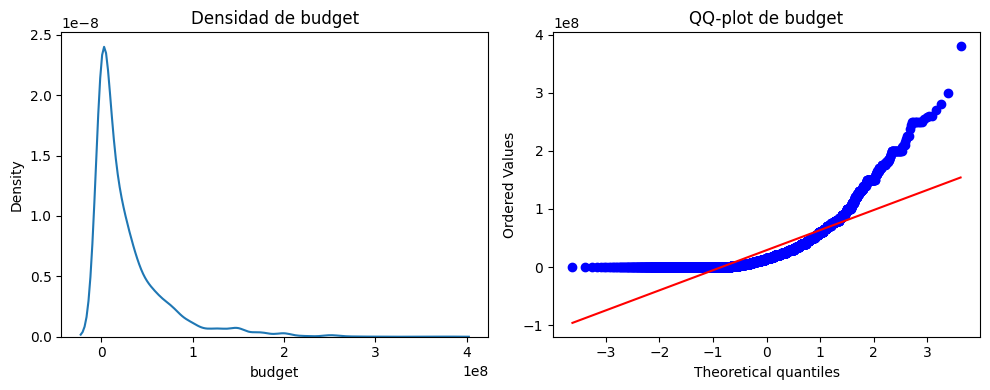

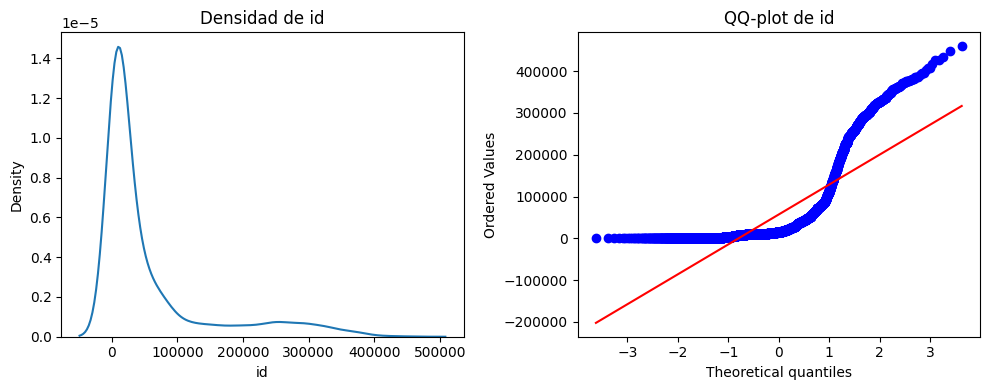

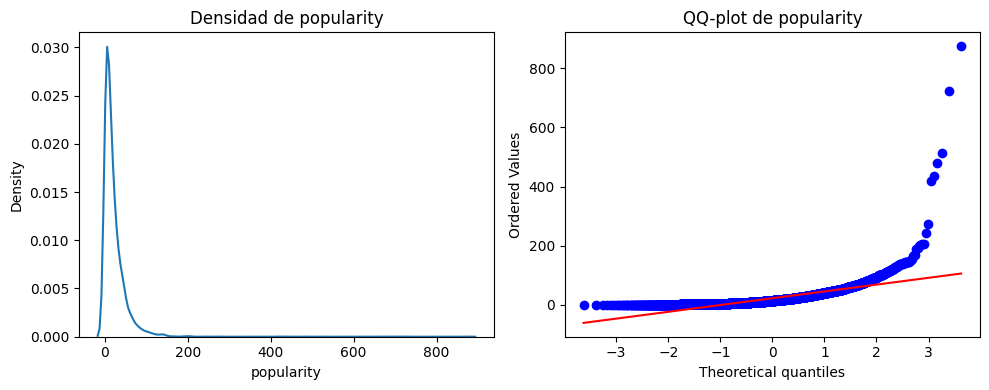

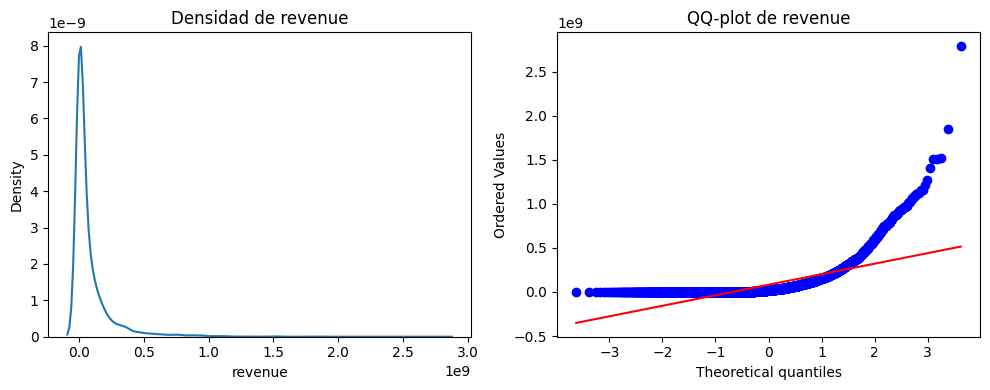

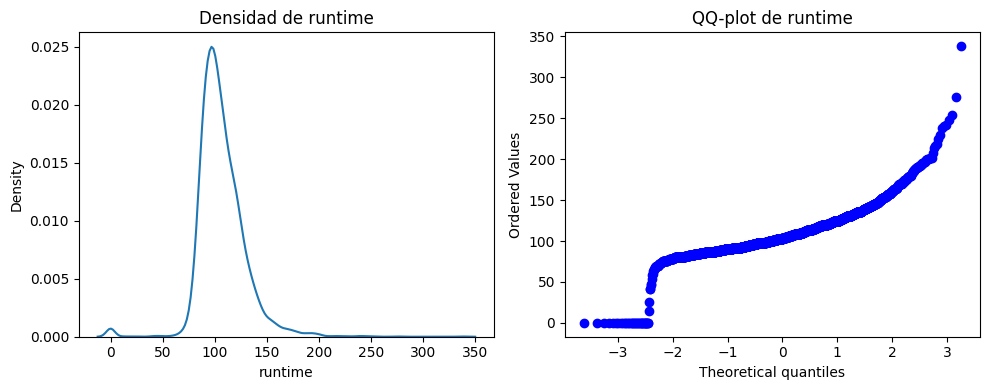

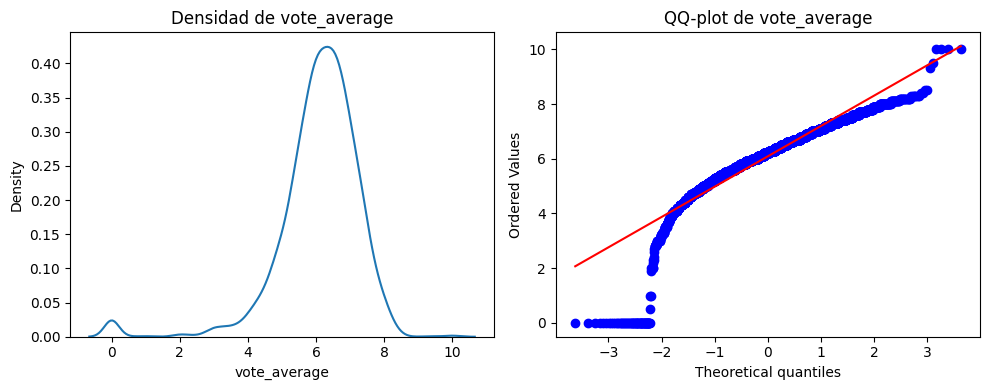

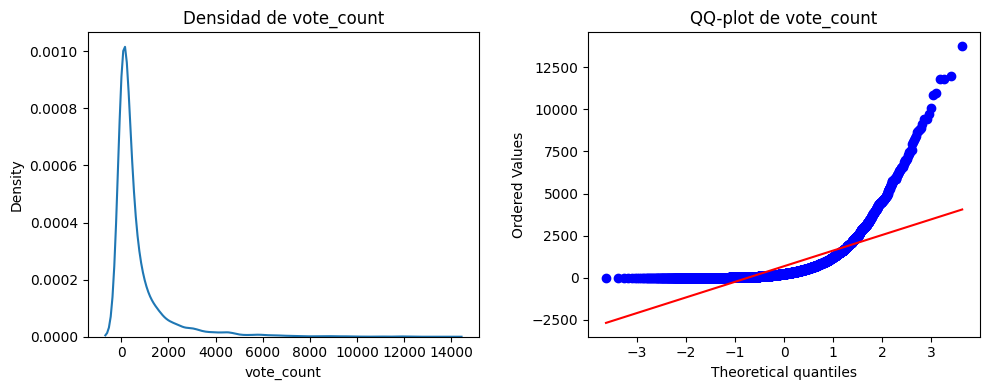

In [80]:
for col in new_df:
    fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
    
    # Convertir la columna a tipo float
    col_float = new_df[col].astype(float)
    
    # Densidad
    sns.kdeplot(data=col_float, ax=axs[0])
    axs[0].set_title(f"Densidad de {col}")
    
    # QQ-plot
    stats.probplot(col_float, dist="norm", plot=axs[1])
    axs[1].set_title(f"QQ-plot de {col}")
    
    plt.tight_layout()
    plt.show()



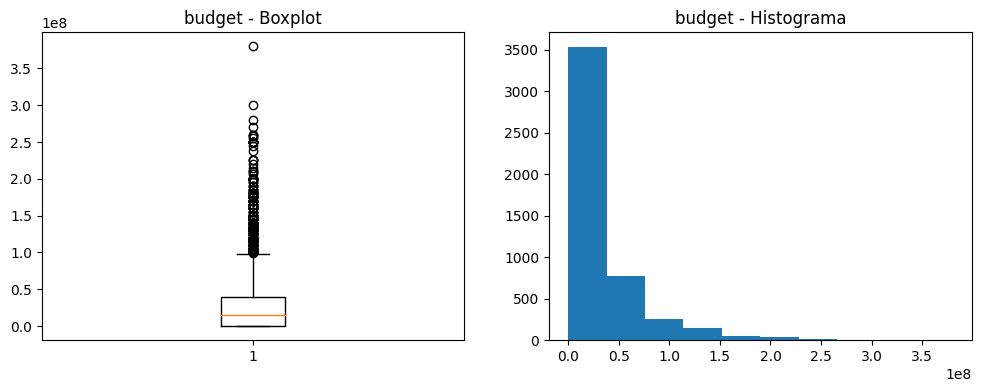

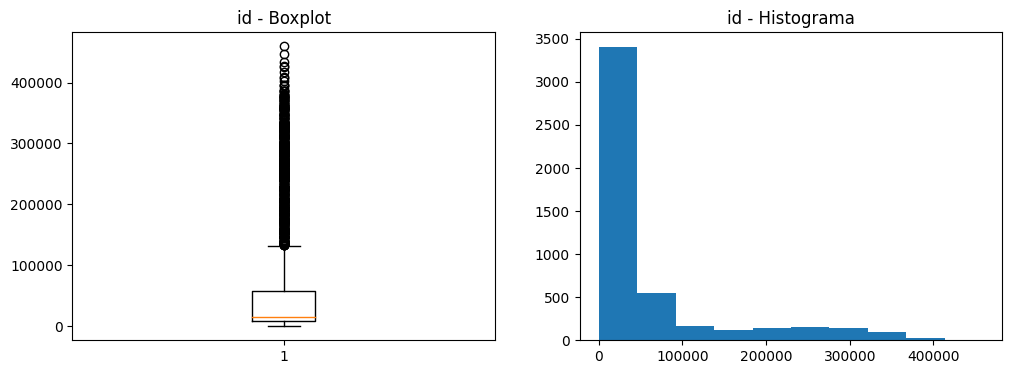

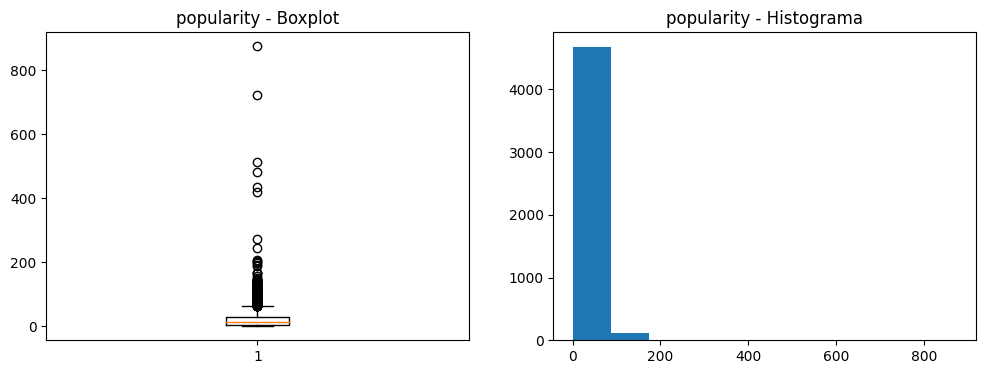

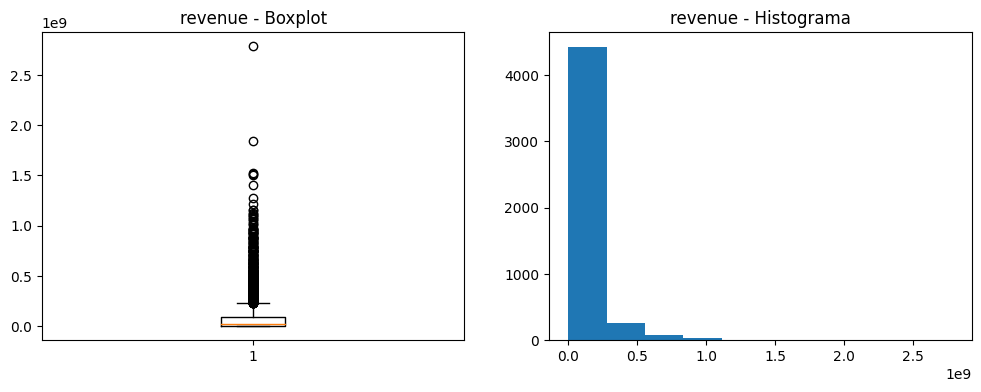

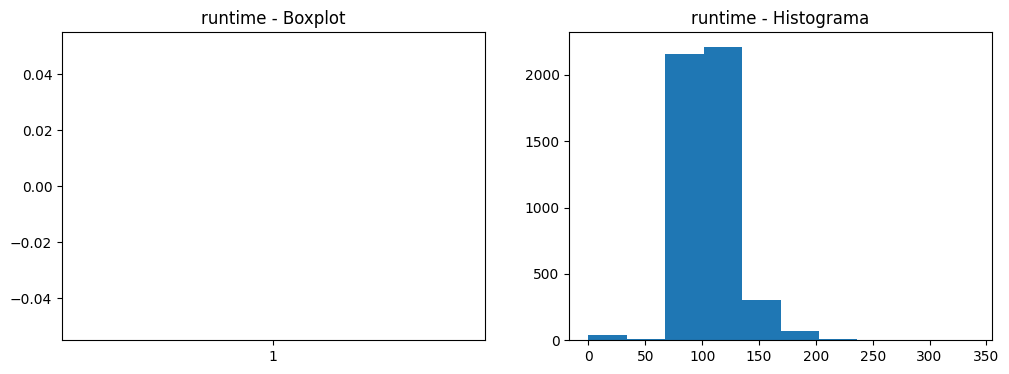

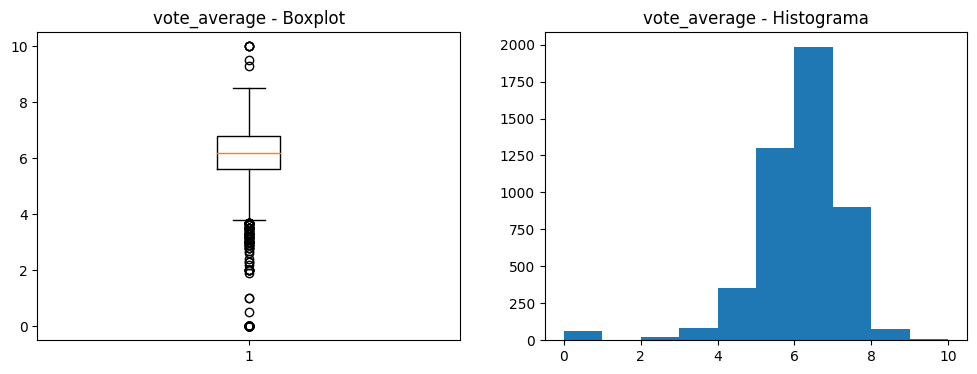

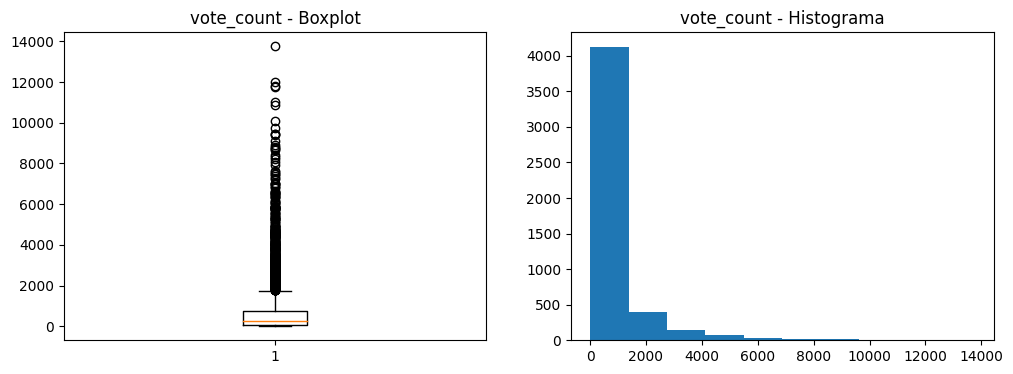

In [81]:
for col in new_df:
    if col in new_df:
        fig, axs = plt.subplots(1, 2, figsize=(12, 4))

        # Boxplot
        axs[0].boxplot(new_df[col])
        axs[0].set_title(f'{col} - Boxplot')

        # Histograma
        axs[1].hist(new_df[col])
        axs[1].set_title(f'{col} - Histograma')

        plt.show()


In [82]:
print(df.dtypes)


rating              int64
genre               int64
year                int64
votes               int64
director            int64
writer              int64
star                int64
country             int64
budget              int64
gross               int64
company             int64
runtime             int64
released_country    int64
released_month      int64
dtype: object


In [83]:
new_df.duplicated().sum()

0